# Basic plotting with pandas and Matplotlib



## Input data

In this lesson we will use climate data from Nordic countries between 2015-2019. The dataset is available in Kaggle.




## Getting started

Let's start by importing Pandas and reading our data file.

In [1]:
import pandas as pd



Just as we did last week, we'll read our data file by passing a few parameters to the Pandas `read_csv()` function. In this case, however, we'll include a few additional parameters in order to read the data with a *datetime index*. Let's read the data first, then see what happened.

In [4]:
# IGNORE THIS CELL
# It is only needed to generate the course website
fp = r"nordics_weather.csv"

In [8]:
data = pd.read_csv(
    fp,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["country", "date", "precipitation","snow_depth", "tavg", "tmax", "tmin"],
    parse_dates=["date"],
    index_col="date",
)

So what's different here? Well, we have added two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) containing date data that Pandas will parse and convert to the *datetime* data type. For many common date formats this parameter will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in Pandas as we'll see below.

Having read in the data, let's have a quick look at what we have using `data.head()`.

In [9]:
data.head()

,country,precipitation,snow_depth,tavg,tmax,tmin
date,,,,,,
2015-01-01,Finland,1.714141,284.545455,1.428571,2.912739,-1.015287
2015-01-02,Finland,10.016667,195.000000,0.553571,2.358599,-0.998718
2015-01-03,Finland,3.956061,284.294118,-1.739286,0.820382,-3.463871
2015-01-04,Finland,0.246193,260.772727,-7.035714,-3.110828,-9.502581
2015-01-05,Finland,0.036364,236.900000,-17.164286,-8.727564,-19.004487


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame.

## Basic x-y plot

Now we're ready for our first plot. We can start by using the basic line plot in Pandas to look at our temperature data.

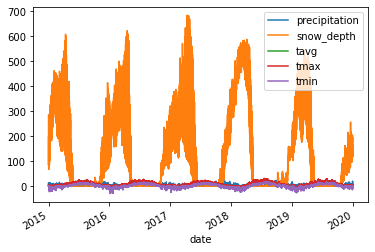

In [10]:
ax = data.plot()

If all goes well, you should see the plot above.

OK, so what happened here?

1. We first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis.
2. In case we want to be able to modify the plot or add anything, we assign the plot object to the variable `ax`. We can check its type below.

In fact, let's check the type of the `ax` variable now.

In [11]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

OK, so it looks like we have some kind of plot data type that is part of Matplotlib. Clearly, pandas is using Matplotlib for generating our plots.

### Selecting our plotted data

Now, let's make a few small changes to our plot and plot the data again. First, let's only plot the observed temperatures in the `data['tavg']` column, and let's restrict ourselves to observations from 2017 and onwards. We can do this by selecting the desired data column and date range first, then plotting our selection.

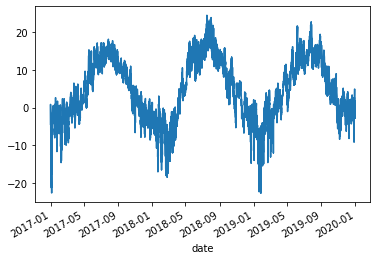

In [89]:

temps_2017 = data.loc[(data.index >= "01-01-2017") & (data['country'] == "Sweden"), ["tavg", "country"]]
ax = oct1_temps.plot()

So, what did we change?

1. Well, we selected only the `'tavg'` column now by using `data['tavg']` instead of `data`.
2. We've added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is greater than `'2017-01-01'`.
3. By saving this selection to the DataFrame `temps_2017` we're able to now use `temps_2017.plot()` to plot only our selection. This is cool, but we can do even better...

## Basic plot formatting

We can make our plot look a bit nicer and provide more information by using a few additional plotting options to pandas/Matplotlib.

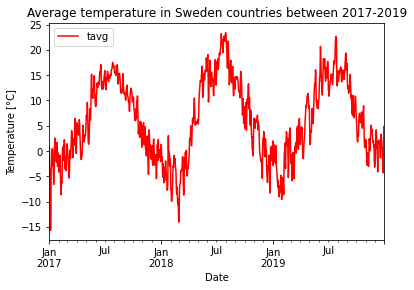

In [90]:
# Change line and symbol format, and add axis labels/title
ax = temps_2017.plot(
    style='r',
    title="Average temperature in Sweden countries between 2017-2019",
    xlabel="Date",
    ylabel="Temperature [°C]",
)

Now we see our temperature data as a red  line.
This comes from the additional `style='r'` used with `oct1_temps.plot()`.
In this case, `r` tells the `oct1_temps.plot()` function to use red color for the lines and symbols.
You can use `help(oct1_temps.plot)` to find out more about formatting plots or have a look at the [documentation on the pandas website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line).
We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters.

In [10]:
# help(oct1_temps.plot)

### Embiggening\* the plot

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger.
Fortunately, there is an easy way to make the plots larger in pandas/Matplotlib.
We can simply add the `figsize` parameter with the desired figure size listed as a tuple (a set of values in normal parentheses) that lists the width and height of the figure (in inches!).

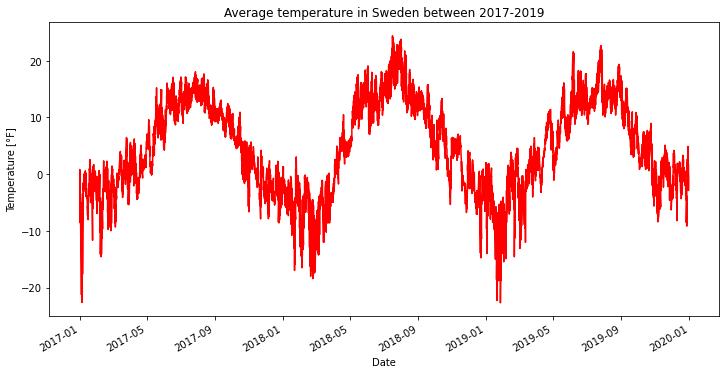

In [91]:
# Adjust the figure size
ax = oct1_temps.plot(
    style='r',
    title="Average temperature in Sweden between 2017-2019",
    xlabel="Date",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
)

The cell above sets the default plot size to be 12 inches wide by 6 inches tall.
Feel free to change these values if you prefer.

```{note}
It is also possible to change the default figure size for all figures in a Jupyter Notebook by importing the pyplot module from matplotlib (i.e., `import matplotlib.pyplot as plt`)and then defining the default figure size using `plt.rcParams['figure.figsize'] = [12, 6]`. In this case the figure size should be given as a Python list.
```


### Other common plot formatting operations

#### Adding text to the plot

Adding text to plots can be done using `ax.text()`.

```python
ax.text(x, y, 'Text to display')
```

This would display "Text to display" at the location *x*, *y* on the plot.
We'll see how to do this in a live example in just a second.

#### Changing the axis ranges

Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function

```python
df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
```

where `xmin` should be the minimum bound of the x-axis, `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`.


In [1]:
# Define the start, end, and cold times
start_time = ("08-01-2017")
end_time = pd.to_datetime("08-31-2017")

# Create the plot, including the axis limits

ax = temps_2017.plot(
    style='r',
    title="Average temperature in Sweden in August 2017",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[-15.0, 25.0],
)


# Add text to display the coldest temperature
#ax.text(cold_time, 42.0, "<- Coldest temperature in early afternoon")

NameError: name 'pd' is not defined

### Check your understanding

Create a line plot similar to our examples above with the following attributes:
    
- Average temperature in Nordic countries in February 2017
- A dotted black line connecting the observations (do not show the data points)


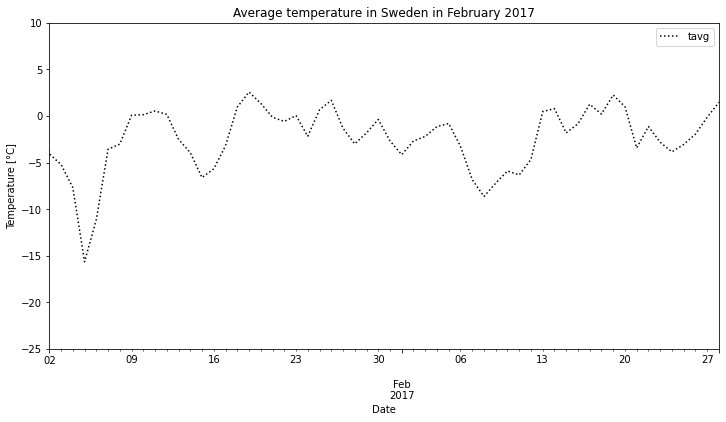

In [93]:
# Solution
# Define start, end, and cold times
start_time = pd.to_datetime("01-02-2017")
end_time = pd.to_datetime("28-02-2017")
# Create the plot, including the axis limits

ax = temps_2017.plot(
    style="k:",
    title="Average temperature in Sweden in February 2017",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[-25.0, 10.0],
)

# Display text on plot
#ax.text(warm_time, 43.0, "Warmest time of the evening ->")

## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas. Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter. Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed. Let's select data for the first week of May in 2017, for Sweden.

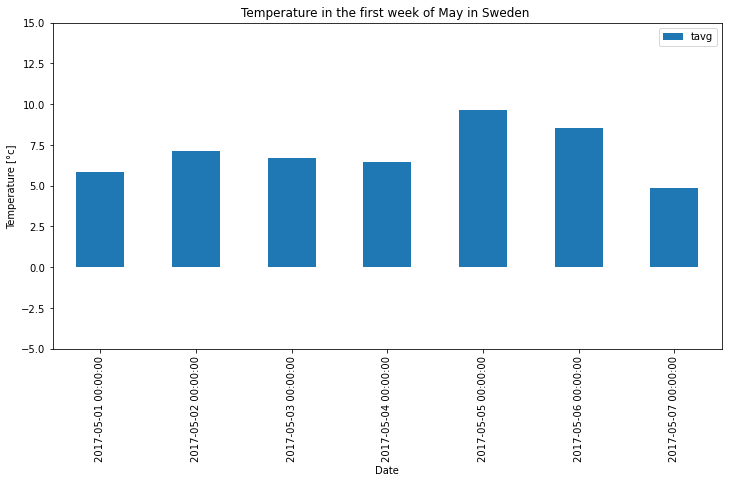

In [96]:
# Define time range
temps_May_week1 = temps_2017.loc[(temps_2017.index >= "2017-05-01") & (temps_2017.index <= "2017-05-07")]

# Create bar plot
ax = temps_May_week1.plot(
    kind="bar",
    title="Temperature in the first week of May in Sweden ",
    xlabel="Date",
    ylabel="Temperature [°c]",
    figsize=(12, 6),
    ylim=[-5, 15])

# Add plot text
#ax.text(0, 42.1, "Coldest \ntemp \nv")

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using pandas can be done in several ways. The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function. When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell. The file name is required, and the image format will be determined based on the listed file extension. Note that because we have not used Matplotlib for any of the earlier plots, we need to import it here first.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS. PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics. Let's check out an example and save our lovely bar plot.

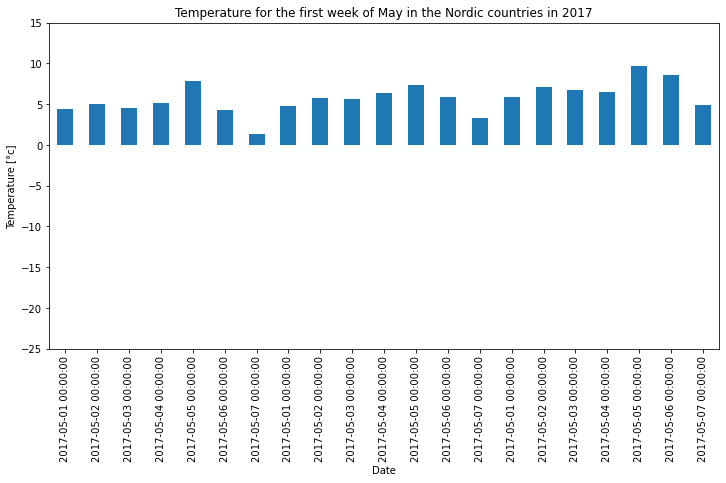

In [62]:
# Import matplotlib
import matplotlib.pyplot as plt
temps_May_week1 = temps_2017.loc[(temps_2017.index >= "2017-05-01") & (temps_2017.index <= "2017-05-07")]

# Create bar plot
ax = temps_May_week1.plot(
    kind="bar",
    title="Temperature for the first week of May in the Nordic countries in 2017",
    xlabel="Date",
    ylabel="Temperature [°c]",
    figsize=(12, 6),
    ylim=[-25, 15])

# Save plot to file
plt.savefig("bar-plot.png")

If you refresh your **Files** tab on the left side of the JupyterLab window you should now see `bar-plot.png` listed.
We could try to save another version in higher resolution with a minor change to our plot commands above.

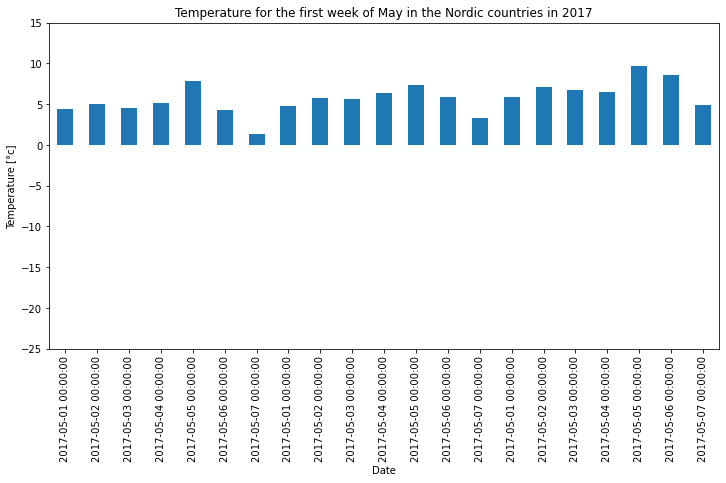

In [63]:
# Create bar plot
temps_May_week1 = temps_2017.loc[(temps_2017.index >= "2017-05-01") & (temps_2017.index <= "2017-05-07")]

# Create bar plot
ax = temps_May_week1.plot(
    kind="bar",
    title="Temperature for the first week of May in the Nordic countries in 2017",
    xlabel="Date",
    ylabel="Temperature [°c]",
    figsize=(12, 6),
    ylim=[-25, 15])


# Save plot to file (high resolution, PDF)
plt.savefig("bar-plot-hi-res.pdf", dpi=600)